In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
# import pbdlib as pbd
from scipy.io import loadmat # loading data from matlab

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
datapath = './data/gui/'
data = np.load(datapath + 'test_001.npy',allow_pickle=True,encoding="latin1")[()] 

In [5]:
demos_x = data['x']  #Position data
demos_dx = data['dx'] # Velocity data
demos_xdx = [np.hstack([_x, _dx]) for _x ,_dx in zip(demos_x, demos_dx)] # Position-velocity

# Time aligning

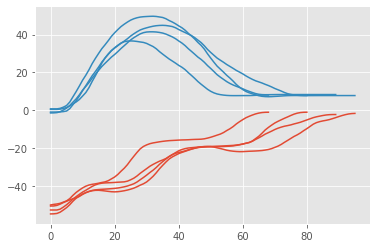

In [6]:
fig, ax = plt.subplots(1,1)
ax.grid(True)
for d in demos_x:
    ax.set_prop_cycle(None)
    ax.plot(d)

In [7]:
import utils
demos_x, demos_dx, demos_xdx = utils.align_trajectories(demos_x, [demos_dx, demos_xdx]) 

t = np.linspace(0, 100, demos_x[0].shape[0])

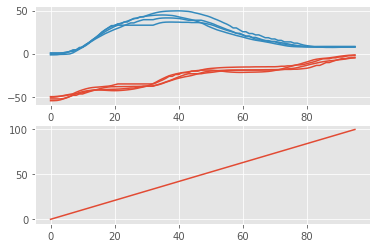

In [8]:
fig, ax = plt.subplots(nrows=2)
for d in demos_x:
    ax[0].set_prop_cycle(None)
    ax[0].plot(d)
    
ax[1].plot(t)

## Create augmented data with time 

In [9]:
demos = [np.hstack([t[:,None], d]) for d in demos_xdx]
data = np.vstack([d for d in demos])

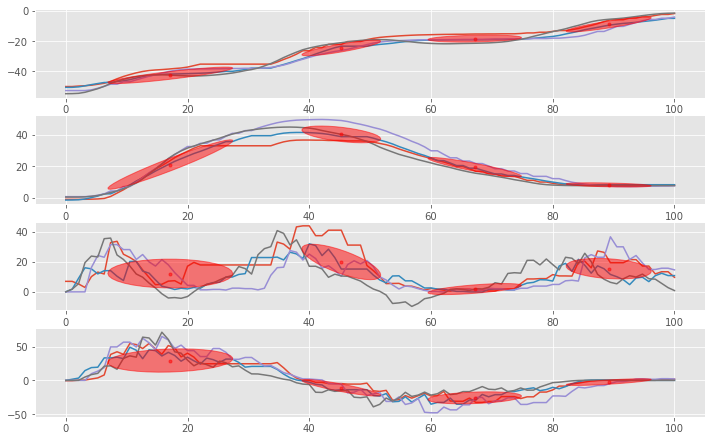

In [11]:
import gmm
from plot import plot_gmm
model = gmm.GMM(nb_states=4, nb_dim=5)

model.init_hmm_kbins(demos) # initializing model

# EM to train model
model.em(data, reg=[0.1, 1., 1., 1., 1.]) 


# plotting
fig, ax = plt.subplots(nrows=4)
fig.set_size_inches(12,7.5)

# position plotting

for i in range(4):

    for p in demos:
        ax[i].plot(p[:, 0], p[:, i + 1])

    plot_gmm(model.mu, model.sigma, ax=ax[i], dim=[0, i + 1]);
